## SVM - Support Vector Machines: Work best with datasets having <2000 datapoints(smaller datasets)

support vector machine:
1. it converts the input space(2D) into high dimensional space.
it will be able to differentiate between the classes properly.
2. datapoints/vectors are converted into high dimensional space, a hyperplane is fit . 
3. decision boundaries are drawn parallel to the hyperplanes. Each decision boundary must pass through 1 or more vectors of that class.
4. margin refers to the distance between both the decision boundaries.
5. distance from hyperplane to each decision boundary line is calculated. 
6. the hyperplane that gives maximum distance, is considered as the final hyperplane.

how are input space 2D converted into high dimensional space: kernel 

    kernel types:
    linear
    polynomial
    sigmoid
    RBF




### Business Usecase: Build a model that can prescribe Drug to the patient on basis of their gender, medical history.

## Data Gathering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Perform basic quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features
Y: Drug

In [8]:
X = df.drop(columns='Drug')
Y =df[['Drug']]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


## Data Preprocessing and Data cleaning

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform='pandas')

In [13]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794


## Split the data into training and testing

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)
print(f'xtrain:{xtrain.shape}, xtest:{xtest.shape},ytrain:{ytrain.shape}, ytest:{ytest.shape}')

xtrain:(150, 9), xtest:(50, 9),ytrain:(150, 1), ytest:(50, 1)


## SVM Model Building

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel='rbf',probability=True)
model.fit(xtrain,ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
model.score(xtrain,ytrain)

0.9933333333333333

In [18]:
model.score(xtest,ytest)

0.92

In [19]:
model2 = SVC(kernel='sigmoid',probability=True)
model2.fit(xtrain,ytrain)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
model2.score(xtrain,ytrain)

0.9066666666666666

In [21]:
model2.score(xtest,ytest)

0.88

In [25]:
model3 = SVC(kernel='linear',probability=True)
model3.fit(xtrain,ytrain)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
model3.score(xtrain,ytrain)

0.9933333333333333

In [27]:
model3.score(xtest,ytest)

0.96

## Evaluation of model

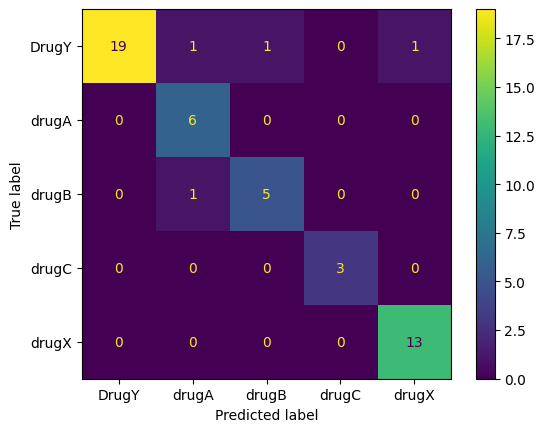

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

In [30]:
print("==================RBF=================")
print(classification_report(ytest,y_pred=model.predict(xtest)))

==================RBF=================
              precision    recall  f1-score   support

       DrugY       1.00      0.86      0.93        22
       drugA       0.75      1.00      0.86         6
       drugB       0.83      0.83      0.83         6
       drugC       1.00      1.00      1.00         3
       drugX       0.93      1.00      0.96        13

    accuracy                           0.92        50
   macro avg       0.90      0.94      0.92        50
weighted avg       0.93      0.92      0.92        50



In [31]:
print("==================sigmoid=================")
print(classification_report(ytest,y_pred=model2.predict(xtest)))

==================sigmoid=================
              precision    recall  f1-score   support

       DrugY       0.83      0.91      0.87        22
       drugA       1.00      1.00      1.00         6
       drugB       0.80      0.67      0.73         6
       drugC       1.00      1.00      1.00         3
       drugX       0.92      0.85      0.88        13

    accuracy                           0.88        50
   macro avg       0.91      0.88      0.90        50
weighted avg       0.88      0.88      0.88        50



In [32]:
print("==================linear=================")
print(classification_report(ytest,y_pred=model3.predict(xtest)))

==================linear=================
              precision    recall  f1-score   support

       DrugY       1.00      0.95      0.98        22
       drugA       0.86      1.00      0.92         6
       drugB       0.83      0.83      0.83         6
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        13

    accuracy                           0.96        50
   macro avg       0.94      0.96      0.95        50
weighted avg       0.96      0.96      0.96        50



## We can consider model3 for final predictions

## Out of sample data: future data being provided by client. Client wants you to generate the predictions and return the results in a csv file

In [39]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/DrugTest.csv'
xnew = pd.read_csv(path2)
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [40]:
xnew_pre = pre.transform(xnew)
# Using finalsed model to predict the final drugs to be prescribed
Drug_predicted = model3.predict(xnew_pre)
# Adding the predictions to Xnew data 
xnew['Drug Predicted'] = Drug_predicted
# save the xnew results into a csv file
xnew.to_csv('DrugResults.csv',index=False)